In [1]:
print(123)

123


In [3]:
!pip freeze

annotated-types==0.7.0
asttokens @ file:///home/conda/feedstock_root/build_artifacts/asttokens_1698341106958/work
blis==1.0.1
catalogue==2.0.10
certifi==2024.8.30
charset-normalizer==3.4.0
click==8.1.7
cloudpathlib==0.20.0
colorama @ file:///home/conda/feedstock_root/build_artifacts/colorama_1666700638685/work
comm @ file:///home/conda/feedstock_root/build_artifacts/comm_1710320294760/work
confection==0.1.5
contourpy==1.3.0
cycler==0.12.1
cymem==2.0.8
debugpy @ file:///D:/bld/debugpy_1731044895183/work
decorator @ file:///home/conda/feedstock_root/build_artifacts/decorator_1641555617451/work
duckduckgo_search==6.3.5
exceptiongroup @ file:///home/conda/feedstock_root/build_artifacts/exceptiongroup_1720869315914/work
executing @ file:///home/conda/feedstock_root/build_artifacts/executing_1725214404607/work
fastai==2.7.18
fastcore==1.7.20
fastdownload==0.0.7
fastprogress==1.0.3
filelock==3.16.1
fonttools==4.55.0
fsspec==2024.10.0
idna==3.10
importlib_metadata @ file:///home/conda/feedstoc

In [2]:
from duckduckgo_search import DDGS 
from fastcore.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

In [3]:
urls = search_images('healthy tomato leaf', max_images=1)
urls[0]

'https://cdn8.dissolve.com/p/D869_27_632/D869_27_632_1200.jpg'

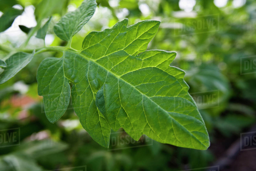

In [4]:
from fastdownload import download_url
dest = 'good_tomato_leaf.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

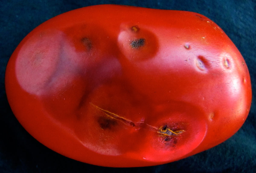

In [8]:
download_url(search_images('Anthracnose tomato disease', max_images=1)[0], 'tom-anthra.jpg', show_progress=False)
Image.open('tom-anthra.jpg').to_thumb(256,256)

In [11]:
searches = 'healthy tomato leaf', 'Bacterial Canker Tomato disease', 'Anthracnose Tomato Disease', 'Early Blight Tomato Disease', 'Late Blight Tomato Disease', 'Septoria Leaf Spot Tomato Disease', 'Bacterial Spot Tomato Disease'
path = Path('Tomato')

for o in searches:
    try:
        dest = (path/o)
        dest.mkdir(exist_ok=True, parents=True)
        download_images(dest, urls=search_images(f'{o} photo'))
        time.sleep(5)
        resize_images(path/o, max_size=400, dest=path/o)
    except:
        print("sed")

sed


In [5]:
path = Path('Tomato')

In [13]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

UnidentifiedImageError: cannot identify image file 'C:\\Projects\\mini-project-sem3\\Tomato\\Anthracnose Tomato Disease\\48b30b8d-0186-4cfe-850c-059870870644.jpg'